In [1]:
#21/01/2025
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


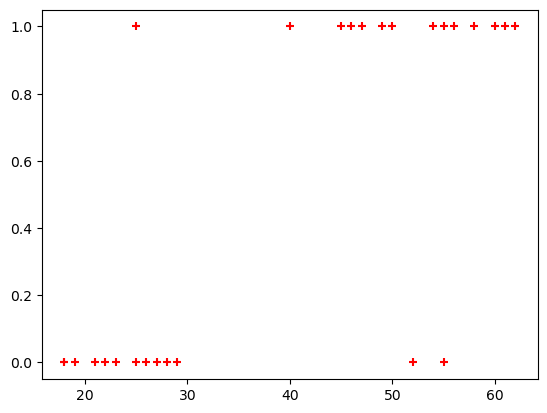

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test= train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [6]:
X_test

,age
1,25
20,21
12,27
14,49
10,18
24,50


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model=LogisticRegression()

In [9]:
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
X_test

,age
1,25
20,21
12,27
14,49
10,18
24,50


In [11]:
y_predicted=model.predict(X_test)

In [12]:
model.predict_proba(X_test)

array([[0.81742353, 0.18257647],
       [0.87539456, 0.12460544],
       [0.78137907, 0.21862093],
       [0.23072582, 0.76927418],
       [0.90783006, 0.09216994],
       [0.2113427 , 0.7886573 ]])

In [13]:
model.score(X_test,y_test)

1.0

In [14]:
y_predicted

array([0, 0, 0, 1, 0, 1], dtype=int64)

In [15]:
X_test

,age
1,25
20,21
12,27
14,49
10,18
24,50


In [16]:
model.coef_

array([[0.11263357]])

let's defines sigmoid function

In [17]:
model.intercept_

array([-4.31482737])

In [18]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [19]:
def prediction_function(age):
    z=0.042*age-1.53  #0.04150133 - 0.042 and -1.527 -1.53
    y=sigmoid(z)
    return y

In [20]:
age=35
prediction_function(age)

0.4850044983805899

0.485<0.5 which means person with age 35 will not buy insurance

In [21]:
age=43
prediction_function(age)

0.568565299077705

0.5685>0.5 which means person with age 43 will buy insurance

# 22/01/2025

In [22]:
#column with continous value==>mean imputation
#column with Discrete/catogorical value==>mode imputation


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [24]:
claimants=pd.read_csv("claimants.csv")

In [25]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [26]:
#THe 0th column is CASENUM which is not useful, hence drop thecolumn 0

In [27]:
c1=claimants.drop('CASENUM',axis=1)

In [28]:
c1.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [29]:
c1.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [30]:
#Let us check the null values

In [31]:
c1.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [32]:
#There are several null values around 290

In [33]:
#Let us use mean imputaion for continous data and mode imputation

In [34]:
mean_value=c1.CLMAGE.mean()

In [35]:
mean_value

28.414422241529106

In [36]:
#mean_value=c1.CLMSEX.mode()

In [37]:
#mean_value

In [38]:
c1.CLMAGE =c1.CLMAGE.fillna(mean_value)

In [39]:
c1.CLMAGE.isna().sum()

0

In [40]:
###
#for discrete value like CLMSEX we neew to use mode imputation

In [41]:
mode_CLMSEX=c1.CLMSEX.mode()

In [42]:
mode_CLMSEX

0    1.0
Name: CLMSEX, dtype: float64

In [43]:
#HERE if you will observe the outputs it is 0 1 i.e
#mode_CLMSEX[0]=0,mode_CLMSEX[1]=1,WE are passing mode_CLMSEX[0]

In [44]:
c1.CLMSEX=c1.CLMSEX.fillna((mode_CLMSEX)[0])

In [45]:
c1.CLMSEX.isna().sum()

0

In [46]:
#CLMINSUR

In [47]:
mode_INSUR=c1['CLMINSUR'].mode()

In [48]:
mode_INSUR

0    1.0
Name: CLMINSUR, dtype: float64

In [49]:
c1.CLMINSUR=c1.CLMINSUR.fillna((mode_INSUR)[0])


In [50]:
c1.CLMINSUR.isna().sum()


0

In [51]:
#Seat belt

In [52]:
mode_SB=c1['SEATBELT'].mode()


In [53]:
mode_SB

0    0.0
Name: SEATBELT, dtype: float64

In [54]:
c1.SEATBELT=c1.SEATBELT.fillna((mode_SB)[0])


In [55]:
c1.SEATBELT.isna().sum()


0

# #23/01/2025 #

In [56]:
#Model building

In [57]:
logit_model=sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data=c1).fit()

Optimization terminated successfully.
         Current function value: 0.609131
         Iterations 7


In [58]:
logit_model.summary()
#coefficient

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                  0.1209
Time:                        15:14:04   Log-Likelihood:                -816.24
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 1.620e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1493      0.226     -0.660      0.509      -0.592       0.294
CLMAGE         0.0066      0.003      2.058      0.040       0.000       0.013
LOSS          -0.3228      0.029    -10.962      0.000      -0.381      -0.265
CLMINSUR       0.5284      0.210      2.516      0.012       0.117       0.940
CLMSEX         0.3204      0.120      2.674      0.008       0.086       0.555
SEATBELT      -0.6718      0.522     -1.286      0.198      -1.696       0.352
==============================================================================
"""

In [59]:
logit_model.summary2()
#lower th AIC( Akaike Information Criterion) better the model

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: ATTORNEY         Pseudo R-squared: 0.121     
Date:               2025-01-23 15:14 AIC:              1644.4709 
No. Observations:   1340             BIC:              1675.6734 
Df Model:           5                Log-Likelihood:   -816.24   
Df Residuals:       1334             LL-Null:          -928.48   
Converged:          1.0000           LLR p-value:      1.6204e-46
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.1493    0.2260   -0.6604  0.5090  -0.5922   0.2937
CLMAGE        0.0066    0.0032    2.0583  0.0396   0.0003   0.0128
LOSS         -0.3228    0.0294  -10.9615  0.0000  -0.3805  -0.2651
CLMINSUR      0.5284    0.2100    2.5159  0.0119   0.1168   0.9400
CLMSEX        0.3204    0.1198    2.6736  0.0075   0.0855   0.5552
SEATBELT     -0.6718    0.5224   -1.2860  0.1984  -1.6958   0.3521
=================================================================

"""

In [60]:
#let us go for prediction

In [61]:
pred = logit_model.predict(c1.iloc[:,1:])

In [62]:
pred

0       0.000026
1       0.500422
2       0.575767
3       0.474743
4       0.637341
          ...   
1335    0.593816
1336    0.451543
1337    0.715776
1338    0.309620
1339    0.662483
Length: 1340, dtype: float64

In [63]:
#############

In [64]:
#To derive ROC curve

In [65]:
#ROC curve has tpr on y-axis and fpr on x-axis, ideally, tpr must be high and fpr must be low

In [66]:
fpr,tpr,thresholds=roc_curve(c1.ATTORNEY,pred)

In [67]:
#to identiyfy optimum threshold

In [68]:
optimal_idx=np.argmax(tpr-fpr)

In [69]:
optimal_threshold=thresholds[optimal_idx]

In [70]:
optimal_threshold

0.5294418043694737

In [71]:
#0.52944, by default you can take 0.5 value as threshold
#now we want to identify if new value is given to the  model, it will fall in which region 0 or 1, for that we need to derive ROC curve 

In [72]:
#To draw ROC curve

In [73]:
import pylab as pl

In [74]:
i=np.arange(len(tpr))
roc = pd.DataFrame({
    'fpr':pd.Series(fpr,index=i),
    'tpr':pd.Series(tpr,index=i),
    '1-fpr':pd.Series(1-fpr,index=i),
    'tf':pd.Series(tpr-(1-fpr),index=i),
    'threshold':pd.Series(thresholds,index=i)
})

In [75]:
#this code creates a DataFrame called roc using Pandas(pd)
##It organizes various metrics related to the Reciever Operating Characteristics into columns.Each column represents a specific metric, and the rows are index

area under the curve 0.760101


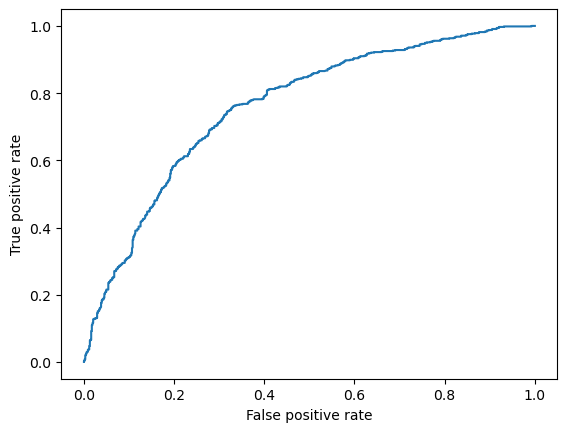

In [76]:
#this code cretes a dataframe called roc using Pandas (pd)
#Plot the ROC
plt.plot(fpr,tpr)
plt.xlabel("False positive rate");plt.ylabel("True positive rate")
roc_auc=auc(fpr,tpr)
print("area under the curve %f"%roc_auc)

In [77]:
#############################################
#now let us add prediction column in dataframe
c1["pred"]=np.zeros(1340)
c1.loc[pred>optimal_threshold,"pred"]=1

In [78]:
#if predicted value is greater than optimal threshold then change pred column a classification report
classification=classification_report(c1["pred"],c1["ATTORNEY"])
classification

'              precision    recall  f1-score   support\n\n         0.0       0.67      0.74      0.70       615\n         1.0       0.76      0.69      0.72       725\n\n    accuracy                           0.71      1340\n   macro avg       0.71      0.72      0.71      1340\nweighted avg       0.72      0.71      0.71      1340\n'

In [79]:
####################################################
#Spliting the data into train and test data
train_data,test_data=train_test_split(c1,test_size=0.3)

In [80]:
#model train using
model=sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+SEATBELT', data=train_data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.602270
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                  938
Model:                          Logit   Df Residuals:                      933
Method:                           MLE   Df Model:                            4
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                  0.1298
Time:                        15:14:12   Log-Likelihood:                -564.93
converged:                       True   LL-Null:                       -649.23
Covariance Type:            nonrobust   LLR p-value:                 2.084e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0966      0.252      0.383      0.702      -0.398       0.591
CLMAGE         0.0073      0.004      1.914      0.056      -0.000       0.015
LOSS          -0.3602      0.037     -9.771      0.000      -0.432      -0.288
CLMINSUR       0.4611      0.245      1.883      0.060      -0.019       0.941
SEATBELT       0.0812      0.599      0.136      0.892      -1.093       1.255
==============================================================================
"""

In [81]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: ATTORNEY         Pseudo R-squared: 0.130     
Date:               2025-01-23 15:14 AIC:              1139.8581 
No. Observations:   938              BIC:              1164.0769 
Df Model:           4                Log-Likelihood:   -564.93   
Df Residuals:       933              LL-Null:          -649.23   
Converged:          1.0000           LLR p-value:      2.0840e-35
No. Iterations:     8.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.0966    0.2521   0.3832  0.7016  -0.3976   0.5908
CLMAGE         0.0073    0.0038   1.9144  0.0556  -0.0002   0.0147
LOSS          -0.3602    0.0369  -9.7707  0.0000  -0.4325  -0.2880
CLMINSUR       0.4611    0.2448   1.8835  0.0596  -0.0187   0.9410
SEATBELT       0.0812    0.5990   0.1355  0.8922  -1.0928   1.2552
=================================================================

"""

In [82]:
#AIC is 1157
#prediction on test data
test_pred=model.predict(test_data)
test_data["test_pred"]=np.zeros(402)

In [83]:
#taking threshold value as optimal threshold value
test_data.loc[test_pred>optimal_threshold,"test_pred"]=1

In [84]:
#COnfusion matrix
confusion_matrix=pd.crosstab(test_data.test_pred,test_data.ATTORNEY)
confusion_matrix

ATTORNEY,0,1
test_pred,,
0.0,127,44
1.0,68,163


In [85]:
accuracy_test=(126/157)/402
accuracy_test

0.001996387489305067

In [86]:
#classification report
classification_test=classification_report(test_data["test_pred"],test_data["ATTORNEY"])
classification_test

'              precision    recall  f1-score   support\n\n         0.0       0.65      0.74      0.69       171\n         1.0       0.79      0.71      0.74       231\n\n    accuracy                           0.72       402\n   macro avg       0.72      0.72      0.72       402\nweighted avg       0.73      0.72      0.72       402\n'

In [87]:
#ROC curve and AUC
fpr,tpr,threshold=metrics.roc_curve(test_data["ATTORNEY"],test_pred)

0.7889136628267063

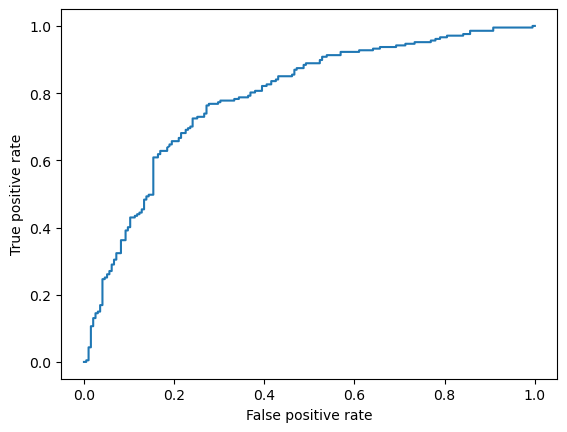

In [92]:
#plot of ROC
plt.plot(fpr,tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")
roc_auc_test=metrics.auc(fpr,tpr)
roc_auc_test

In [93]:
#Prediction on train data
train_pred=model.predict(train_data.iloc[:,1:])

In [94]:
#creating new column
train_data['train_pred']=np.zeros(938)

In [95]:
train_data.loc[train_pred>optimal_threshold,"train_pred"]=1

In [97]:
#confusion matrics
confusion_matrix=pd.crosstab(train_data.train_pred,train_data.ATTORNEY)
confusion_matrix

ATTORNEY,0,1
train_pred,,
0.0,324,109
1.0,166,339


In [98]:
#Accuracy test
accuracy_train=(311/362)/938
accuracy_train

0.0009159019425367244

In [99]:
#Classification report
classification_train=classification_report(train_data.train_pred,train_data.ATTORNEY)
classification_train

'              precision    recall  f1-score   support\n\n         0.0       0.66      0.75      0.70       433\n         1.0       0.76      0.67      0.71       505\n\n    accuracy                           0.71       938\n   macro avg       0.71      0.71      0.71       938\nweighted avg       0.71      0.71      0.71       938\n'